# Lecture8　パターン認識2
<div dir='rtl'>
2022.4岩政
</div>

# クラス分類（続き）

## kNN(k近傍法)
k近傍法（k-nearest neighbors algorithm）  
1.6. Nearest Neighbors http://scikit-learn.org/stable/modules/neighbors.html<br>
sklearn.neighbors.KNeighborsClassifier http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  
距離の種類 http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm # maplotlibのカラーマップを使用

from sklearn.neighbors import KNeighborsClassifier


In [2]:
X = np.array([ [-3.0, -2.0], [-2.0, -1.0], [-1.0, -1.0], [1.0, 1.0], [2.0, 1.0], [3.0, 2.0]])
y = np.array([0, 0, 1, 1, 1, 1])

In [3]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

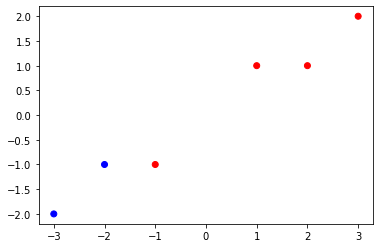

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm.bwr)


In [5]:
X_test = np.array([ [-1.5, -1.0], [0.0, 0.5]])
print('Estimated class: ', neigh.predict(X_test))

Estimated class:  [0 1]


In [6]:
distances, indices = neigh.kneighbors(X_test)
print('Nearest index \n',indices)
print('Distance \n',distances)

Nearest index 
 [[1 2 0]
 [3 2 4]]
Distance 
 [[0.5        0.5        1.80277564]
 [1.11803399 1.80277564 2.06155281]]


### kNN irisデータの分類

In [7]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import  accuracy_score, classification_report
from sklearn.model_selection import train_test_split


#### Xは2次元
iris変量の内，sepal（がく）と petal（花びら）の長さ[cm]を見るため
0番目と2番目のデータをXに格納

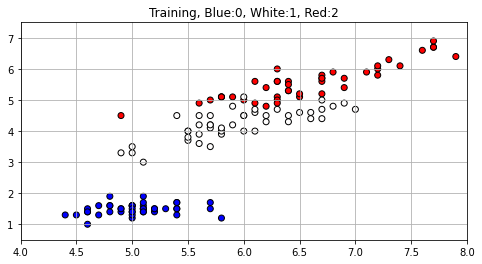

In [8]:
# Load iris data, 150 sample
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/15, random_state=123)

fig = plt.subplots(figsize=(8,4))
plt.xlim(4.0, 8.0)
plt.ylim(0.5, 7.5)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm.bwr, edgecolors='k')
plt.title('Training, Blue:0, White:1, Red:2')
plt.grid()


Accuracy = 0.85
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.71      0.83      0.77         6
           2       0.83      0.71      0.77         7

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20

Accuracy = 0.85
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.71      0.83      0.77         6
           2       0.83      0.71      0.77         7

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20

Accuracy = 0.85
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.71      0.83      0.77         6
           2       0.83    

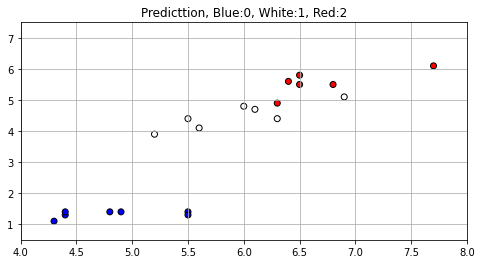

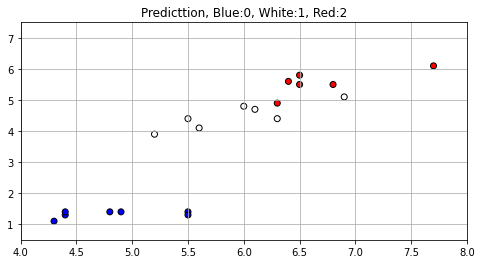

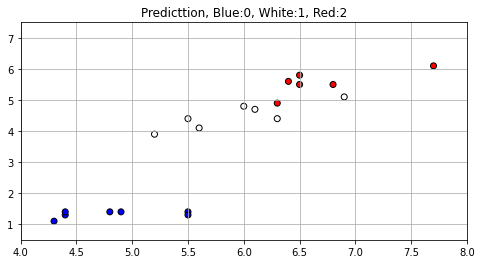

In [9]:
k_range=(3, 7, 9)
for k in k_range:
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    y_test_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    print('Accuracy =',acc)
    print(classification_report(y_test, y_test_pred))
    
    fig = plt.subplots(figsize=(8,4))
    plt.xlim(4.0, 8.0)
    plt.ylim(0.5, 7.5)
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test_pred, cmap=cm.bwr, edgecolors='k')
    plt.grid()
    plt.title('Predicttion, Blue:0, White:1, Red:2')
    

どのデータが誤っているかを調べる。

In [10]:
print('Real       =',y_test)
print('Prediction =',y_test_pred)

Real       = [1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0]
Prediction = [2 2 2 1 0 1 1 0 0 1 1 0 1 2 2 2 0 0 1 0]


In [11]:
#上のグラフと比較してｋNNの性能を推測する。
print('  0:',X_test[0],'\n  5:',X_test[5],'\n 10:',X_test[10])

  0: [6.3 4.9] 
  5: [6.  4.8] 
 10: [6.9 5.1]


#### 説明変数の特徴量を4次元（全て）にして，kNNを実施
ただし，splitする際にrandom_stateを省いているため，試行ごとにトレーニングデータとテストデータの性質が異なる。

In [12]:
# random_state be not set. random division
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=2/15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

(130, 4) (130,)
(20, 4) (20,)


KNeighborsClassifier(n_neighbors=3)

In [13]:
_test_predt = neigh.predict(X_test)
acc = accuracy_score(y_test, y_test_pred)
print('Accuracy =',acc)
print('Real       =',y_test)
print('Prediction =',y_test_pred)

Accuracy = 0.25
Real       = [1 2 2 2 1 0 1 2 2 2 0 1 0 1 0 1 0 0 0 1]
Prediction = [2 2 2 1 0 1 1 0 0 1 1 0 1 2 2 2 0 0 1 0]


## 決定木・ランダムフォレスト

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

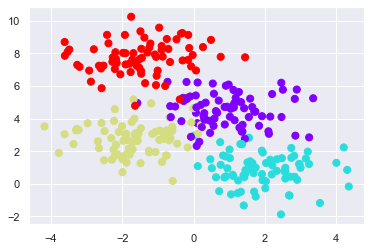

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

C:\Users\miwam\AppData\Local\Temp\ipykernel_20464\520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


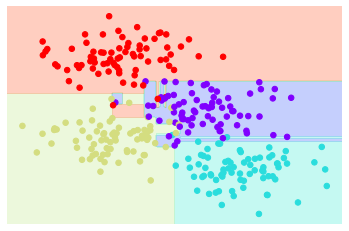

In [23]:
visualize_classifier(DecisionTreeClassifier(max_depth=8), X, y)

c:\Users\miwam\OneDrive\Documents\Lecture\DataScience\GitHub\DataScience2022\notebooks\helpers_05_08.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
  Z = Z.reshape(xx.shape)
c:\Users\miwam\OneDrive\Documents\Lecture\DataScience\GitHub\DataScience2022\notebooks\helpers_05_08.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
  Z = Z.reshape(xx.shape)
c:\Users\miwam\OneDrive\Documents\Lecture\DataScience\GitHub\DataScience2022\notebooks\helpers_05_08.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
  Z = Z.reshape(xx.shape)
c:\Users\miwam\OneDrive\Documents\Lecture\DataScience\GitHub\DataScience2022\notebooks\helpers_05_08.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
  Z = Z.reshape(xx.shape)


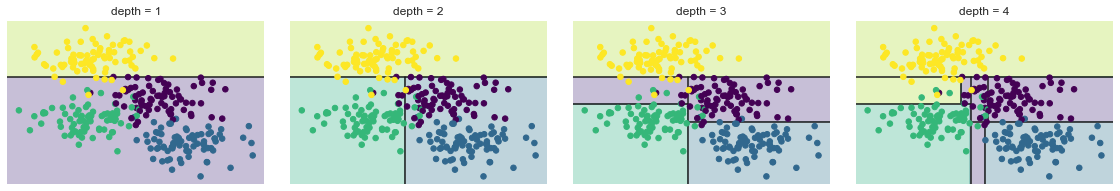

In [8]:
from helpers_05_08 import visualize_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

In [9]:
# helpers_05_08 is found in the online appendix
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

In [10]:
# helpers_05_08 is found in the online appendix
import helpers_05_08
helpers_05_08.randomized_tree_interactive(X, y)

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

### ランダムフォレスト

C:\Users\miwam\AppData\Local\Temp\ipykernel_20464\520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


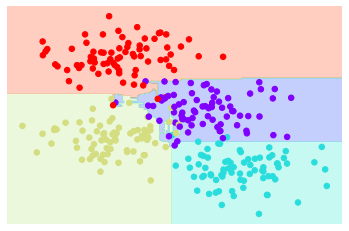

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

C:\Users\miwam\AppData\Local\Temp\ipykernel_20464\520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


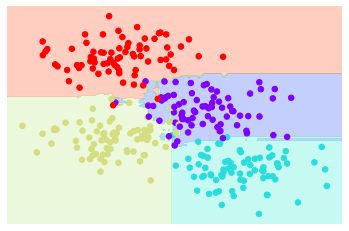

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

#### Example: Random Forest for Classifying Digits

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

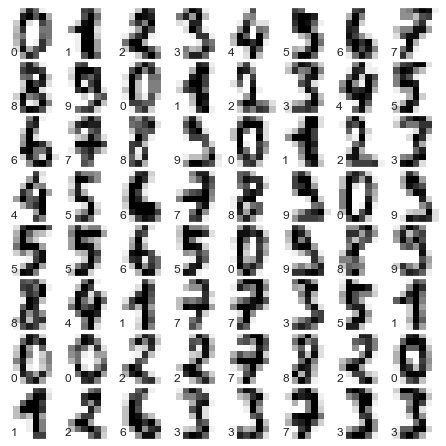

In [14]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [17]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [18]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



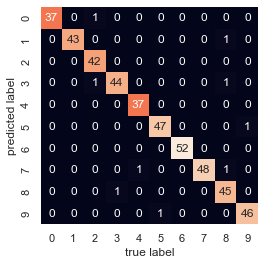

In [19]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');